c:\Users\cinthya\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\cinthya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8919 - loss: 0.3421 - val_accuracy: 0.9818 - val_loss: 0.0502
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9837 - loss: 0.0507 - val_accuracy: 0.9851 - val_loss: 0.0461
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9886 - loss: 0.0362 - val_accuracy: 0.9891 - val_loss: 0.0352
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.9898 - val_loss: 0.0334
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9876 - val_loss: 0.0384
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9906 - val_loss: 0.0366
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9868 - val_loss: 0.0436
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9969 - loss

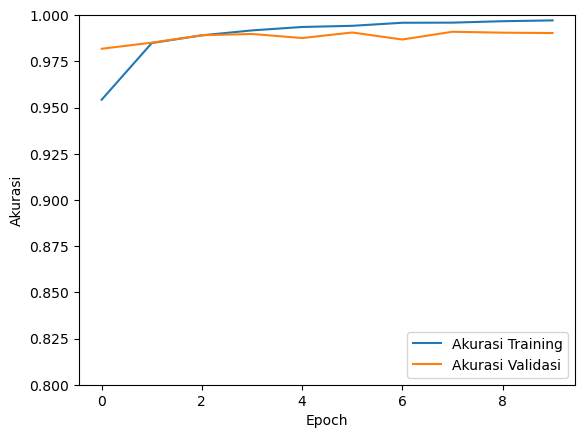

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalisasi gambar menjadi nilai antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Menambahkan dimensi channel pada dataset agar cocok dengan input CNN
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Membangun model CNN
model = models.Sequential([
    # Layer Konvolusi 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Layer Konvolusi 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Layer Konvolusi 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten layer untuk memproses hasil konvolusi menjadi vektor
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 kelas output (0-9)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Melatih model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()
